In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Speed control

In [10]:
speed = pd.read_csv('Data/SpeedControl/800rpm_speed.csv', sep=',')
electrical = pd.read_csv('Data/SpeedControl/800rpm_speed_elec.csv', sep=',')
reference = pd.read_csv('Data/SpeedControl/800rpm_speed_consigne.csv', sep=',')

In [17]:
#rename speed column Gain5:2 to observer_angle
speed.rename(columns={'Gain5:2': 'observer_angle'}, inplace=True)
#rename speed column Encoder Angle [deg] to encoder_angle
speed.rename(columns={'Encoder Angle [deg]': 'encoder_angle'}, inplace=True)
#rename speed column Gain4:2 to observer_speed
speed.rename(columns={'Gain4:2': 'observer_speed'}, inplace=True)
#rename speed column Encoder Speed [rpm] to encoder_speed
speed.rename(columns={'Encoder Speed [rpm]': 'encoder_speed'}, inplace=True)

#drop column Duty 1, Duty 2 and Duty 3 on electrical
electrical.drop('Duty 1', axis=1, inplace=True)
electrical.drop('Duty 2', axis=1, inplace=True)
electrical.drop('Duty 3', axis=1, inplace=True)

#rename reference column switch2 to id_ref
reference.rename(columns={'Switch2': 'id_ref'}, inplace=True)
#rename reference column switch3 to iq_ref
reference.rename(columns={'Switch3': 'iq_ref'}, inplace=True)
#rename reference column sum3 to torque_ref
reference.rename(columns={'Sum3': 'torque_ref'}, inplace=True)
#rename reference column Time / s to Time
reference.rename(columns={'Time / s': 'Time'}, inplace=True)

In [18]:
display(speed.head())
display(electrical.head())
display(reference.head())

,Time,encoder_angle,observer_angle,encoder_speed,observer_speed
0,0.00,-1.627345,-1.560504,795.061096,799.911682
1,0.01,-0.788540,-0.723791,800.938843,799.366394
2,0.02,0.051836,0.115131,803.939026,803.616699
3,0.03,0.892212,0.952763,801.060913,797.356873
4,0.04,1.729447,1.791596,801.000244,800.977112


,Time,I1,I2,I3,Id,Iq,Vd,Vq
0,0.00,-0.061958,-0.082615,-0.475044,0.040206,0.265746,-29.278690,214.179016
1,0.01,-0.475044,0.216873,-0.061960,0.040541,0.399928,-30.902670,209.993042
2,0.02,-0.175556,-0.444063,0.681595,0.060347,0.676186,-33.778496,206.189270
3,0.03,0.629959,-0.423410,-0.526680,-0.133255,0.726966,-31.946011,205.326828
4,0.04,-0.134249,-0.020651,-0.660933,0.138856,0.369232,-31.249748,213.419495


,Time,id_ref,iq_ref,torque_ref
0,0.00,0,0.478661,1.744719
1,0.01,0,0.387254,1.411540
2,0.02,0,0.478242,1.743193
3,0.03,0,0.558905,2.037210
4,0.04,0,0.559440,2.039159


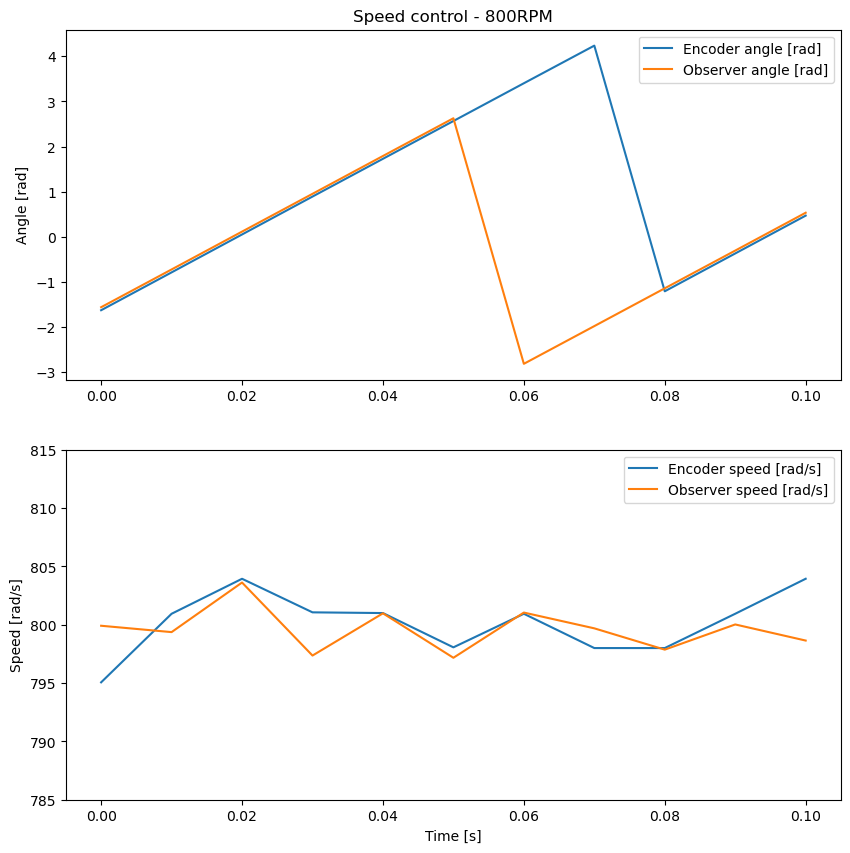

In [26]:
#plot angle and speed in a subplot 2x1
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].plot(speed['Time'], speed['encoder_angle'], label='Encoder angle [rad]')
axs[0].plot(speed['Time'], speed['observer_angle'], label='Observer angle [rad]')

axs[1].plot(speed['Time'], speed['encoder_speed'], label='Encoder speed [rad/s]')
axs[1].plot(speed['Time'], speed['observer_speed'], label='Observer speed [rad/s]')

axs[0].set_title('Speed control - 800RPM')
axs[0].set_ylabel('Angle [rad]')
axs[1].set_ylabel('Speed [rad/s]')
axs[1].set_xlabel('Time [s]')

axs[1].set_ylim(785, 815)

axs[0].legend()
axs[1].legend()
plt.show()


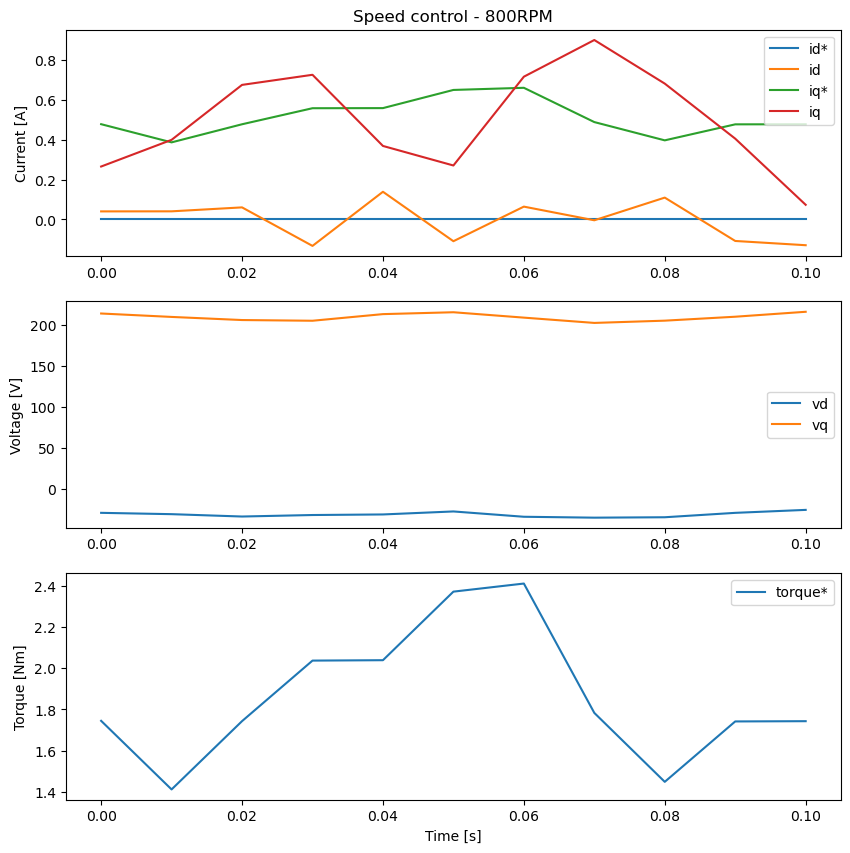

In [27]:
#plot id_ref, id, iq_ref, iq, vd, vq and torque_ref in a subplot 3x1
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
axs[0].plot(reference['Time'], reference['id_ref'], label='id*')
axs[0].plot(electrical['Time'], electrical['Id'], label='id')
axs[0].plot(reference['Time'], reference['iq_ref'], label='iq*')
axs[0].plot(electrical['Time'], electrical['Iq'], label='iq')
axs[0].set_title('Speed control - 800RPM')
axs[0].set_ylabel('Current [A]')
axs[0].legend()

axs[1].plot(electrical['Time'], electrical['Vd'], label='vd')
axs[1].plot(electrical['Time'], electrical['Vq'], label='vq')
axs[1].set_ylabel('Voltage [V]')
axs[1].legend()

axs[2].plot(reference['Time'], reference['torque_ref'], label='torque*')
axs[2].set_ylabel('Torque [Nm]')
axs[2].set_xlabel('Time [s]')
axs[2].legend()


## Torque control

In [37]:
MTPA_MOT = pd.read_csv('Data/TorqueControl/500RPM_Torque5MTPA_MOT.csv', sep=',')
MTPA_GCC = pd.read_csv('Data/TorqueControl/500RPM_Torque5MTPA_GCC.csv', sep=',')

SIMPLE_MOT = pd.read_csv('Data/TorqueControl/500RPM_Torque5Simple_MOT.csv', sep=',')
SIMPLE_GCC = pd.read_csv('Data/TorqueControl/500RPM_Torque5Simple_GCC.csv', sep=',')

In [38]:
display(MTPA_MOT.head())
display(MTPA_GCC.head())
display(SIMPLE_MOT.head())
display(SIMPLE_GCC.head())

,Time,Duty 1,Duty 2,Duty 3,I1,I2,I3,Id,Iq,Vd,Vq
0,0.00,0.288490,0.711510,0.551125,-1.197947,0.784868,0.103275,-0.059003,1.161765,-1.588650,145.734558
1,0.01,0.290518,0.447747,0.709482,-1.063694,-0.206539,1.043045,0.020106,1.223175,-2.810818,144.407944
2,0.02,0.550742,0.286559,0.713441,0.206547,-1.187618,0.805521,-0.115057,1.175254,-1.116939,146.974854
3,0.03,0.711121,0.288879,0.448843,1.012064,-1.032711,-0.320139,-0.054446,1.197246,-1.635083,145.472885
4,0.04,0.710378,0.556250,0.289622,0.888140,-0.041304,-1.290890,0.057088,1.261290,-3.386413,145.256943


,Time / s,rpm to rad/s,CAN Unpack:id,Manual Switch,Gain:1,Ref Field Current,Gain:3,Torque
0,0.0000,52.359879,52.229877,-3.095566,-3.118793,0.8,0.165237,-4.333793
1,0.0009,52.359879,52.181213,-3.029219,-2.963888,0.8,0.165237,-4.240907
2,0.0018,52.359879,52.163681,-2.997633,-2.984543,0.8,0.165237,-4.196686
3,0.0027,52.359879,52.155571,-2.976325,-3.025850,0.8,0.072294,-4.166855
4,0.0036,52.359879,52.152641,-2.960851,-2.963888,0.8,0.082623,-4.145191


,Time,Duty 1,Duty 2,Duty 3,I1,I2,I3,Id,Iq,Vd,Vq
0,0.00,0.680492,0.373839,0.319508,1.807255,-0.826168,-1.125654,0.008325,1.863465,-5.672389,132.948700
1,0.01,0.626635,0.680480,0.319520,0.764214,0.991411,-1.900190,0.041754,1.856172,-6.056764,133.015900
2,0.02,0.319561,0.680439,0.372434,-1.074020,1.745293,-0.908785,0.067163,1.825721,-6.265411,133.053223
3,0.03,0.318980,0.630248,0.681020,-1.910519,0.702250,1.012064,-0.016085,1.853697,-5.609058,133.764618
4,0.04,0.367308,0.318724,0.681276,-0.846823,-1.105001,1.714310,0.001537,1.799664,-5.371884,134.308380


,Time / s,rpm to rad/s,CAN Unpack:id,Manual Switch,Gain:1,Ref Field Current,Gain:3,Torque
0,0.0000,52.359879,52.150185,-3.219801,-3.222065,0.8,0.216873,-4.507721
1,0.0009,52.359879,52.150341,-3.207766,-3.170431,0.8,0.185892,-4.490873
2,0.0018,52.359879,52.150398,-3.195623,-3.222065,0.8,0.216873,-4.473873
3,0.0027,52.359879,52.150425,-3.183446,-3.098141,0.8,0.237528,-4.456825
4,0.0036,52.359879,52.210121,-3.243916,-3.222065,0.8,0.247854,-4.541482


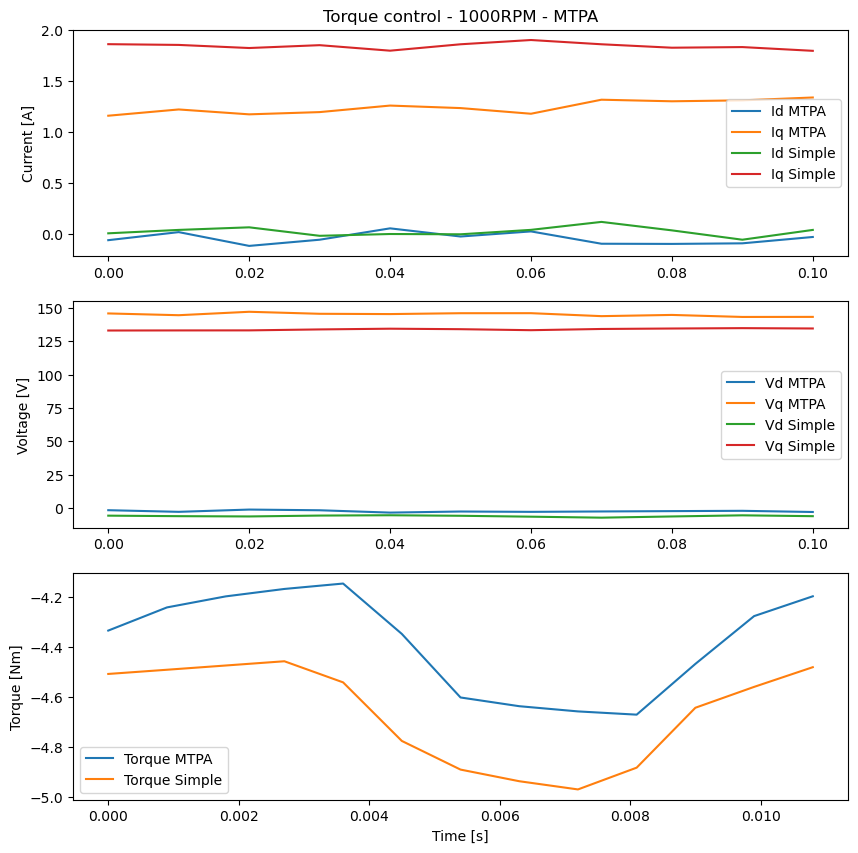

In [39]:
#plot Id, Iq, Vd, Vq and Torque in a subplot 3x1 for MTPA and Simple
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
axs[0].plot(MTPA_MOT['Time'], MTPA_MOT['Id'], label='Id MTPA')
axs[0].plot(MTPA_MOT['Time'], MTPA_MOT['Iq'], label='Iq MTPA')
axs[0].plot(SIMPLE_MOT['Time'], SIMPLE_MOT['Id'], label='Id Simple')
axs[0].plot(SIMPLE_MOT['Time'], SIMPLE_MOT['Iq'], label='Iq Simple')
axs[0].set_title('Torque control - 1000RPM - MTPA')
axs[0].set_ylabel('Current [A]')
axs[0].legend()

axs[1].plot(MTPA_MOT['Time'], MTPA_MOT['Vd'], label='Vd MTPA')
axs[1].plot(MTPA_MOT['Time'], MTPA_MOT['Vq'], label='Vq MTPA')
axs[1].plot(SIMPLE_MOT['Time'], SIMPLE_MOT['Vd'], label='Vd Simple')
axs[1].plot(SIMPLE_MOT['Time'], SIMPLE_MOT['Vq'], label='Vq Simple')
axs[1].set_ylabel('Voltage [V]')
axs[1].legend()

axs[2].plot(MTPA_GCC['Time / s'], MTPA_GCC['Torque'], label='Torque MTPA')
axs[2].plot(SIMPLE_GCC['Time / s'], SIMPLE_GCC['Torque'], label='Torque Simple')
axs[2].set_ylabel('Torque [Nm]')
axs[2].set_xlabel('Time [s]')
axs[2].legend()

